In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
import os
from sklearn.ensemble import RandomForestRegressor


In [65]:
import pandas as pd
import random 
import glob
#from sklearn.model_selection import GridSearchCV

path = r'E:\\EXTRA' # use your path

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
    s = n//10  # sample size of 10%
    skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
    df = pd.read_csv(filename, index_col=None,skiprows=skip,header=0)
    df= df[(df==0).sum(axis=1)/len(df.columns) <= 0.50]
    li.append(df)

frame1 = pd.concat(li, axis=0, ignore_index=True)
frame1=frame1.astype('float32')
#df=frame1.copy()
x=frame1.iloc[:,:]
#x.drop(['BW'], axis=1)
#y=frame[frame.columns[-1]]
y=frame1.iloc[:,-1]
del x['BW']
models = []
svclassifier=SVR(kernel='linear')
svclassifier.fit(x, y)
models.append(svclassifier)
#clf = SVR(kernel='linear')
#param_grid = [
 # {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 #]
#grid_values = {'C':[0.001,.009,0.01,.09,1,5,10,25],'gamma': [0.001, 0.0001], 'kernel': ('linear', 'rbf')}
#grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'precision')
#grid_clf_acc.fit(x,y)
#models.append(grid_clf_acc)
import gc
del [[df,frame1,li]]
gc.collect()
df=pd.DataFrame()
frame1=pd.DataFrame()

In [10]:
frame1

""


In [66]:
path = r'E:\\minor_2' # use your path

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
    s = n//10  # sample size of 10%
    skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
    df = pd.read_csv(filename, index_col=None,skiprows=skip,header=0)
    df= df[(df==0).sum(axis=1)/len(df.columns) <= 0.50]
    li.append(df)

frame2 = pd.concat(li, axis=0, ignore_index=True)
frame2=frame2.astype('float32')
#df=frame2.copy()
x=frame2.iloc[:,:]
#x.drop(['BW'], axis=1)
y=frame2.iloc[:,-1]
del x['BW']
svclassifier=SVR(kernel='linear')
svclassifier.fit(x, y)
models.append(svclassifier)
del [[df,frame2,li]]
gc.collect()
df=pd.DataFrame()
frame2=pd.DataFrame()
li=pd.DataFrame()

In [4]:
from statistics import *
filename=r'E:\\371_COVAREP.csv'
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pd.read_csv(filename, index_col=None,skiprows=skip,header=0)
df= df[(df==0).sum(axis=1)/len(df.columns) <= 0.50]
x=df.iloc[:,:]
del x['BW']
#y=frame[frame.columns[-1]]
#x.drop(['BW'], axis=1)
sum1=0
count=0
for model in models:
    count=count+1
    y_pred=model.predict(x)
    sum1=sum1+y_pred.mean()
sum1/count


3.0016116607216796

In [67]:
path = r'E:\\test' # use your path
all_files = glob.glob(path + "/*.csv")
y_p=[]
y_pid=[]
for filename in all_files:
    n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
    s = n//10  # sample size of 10%
    skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
    df = pd.read_csv(filename, index_col=None,skiprows=skip,header=0)
    df= df[(df==0).sum(axis=1)/len(df.columns) <= 0.50]
    df=df.astype('float32')
    x=df.iloc[:,:]
    del x['BW']
#y=frame[frame.columns[-1]]
    sum1=0
    count=0
    for model in models:
        count=count+1
        y_pred=model.predict(x)
        sum1=sum1+y_pred.mean()
    base=os.path.basename(filename)
    x=os.path.splitext(base)[0]
    x = x.split("_")
    k=sum1/count
    if k<10:
        y_p=np.append(y_p,[0])
        y_pid=np.append(y_pid,[k])
    else:
        y_p=np.append(y_p,[1])
        y_pid=np.append(y_pid,[k])
y_p
#filename=r'E:\full_test_split.csv'
filename=r'E:\Book.csv'
dframe = pd.read_csv(filename, index_col=None,header=0)
y_test=dframe[['PHQ_Score']]
y_test
#tp numberof ones which have said as one by model
#tp and fn number correctly classified
print ("Accuracy when using SVR is ", accuracy_score(y_test,y_p, normalize=True)*100)


Accuracy when using SVR is  50.0


In [26]:
total_positives=accuracy_score(y_test,y_p, normalize=False)

In [38]:
z=pd.DataFrame()
z['PHQ_Score']=[0,1]
z['freq'] = y_test.groupby(['PHQ_Score']).size()
actual_positives=z.loc[z['PHQ_Score'] == 1, 'freq'].iloc[0]
actual_negatives=z.loc[z['PHQ_Score'] == 0, 'freq'].iloc[0]
z
#r=z.iloc[1,1]
#r=z.iloc["PHQ_Score",df.columns.get_loc("freq")]

,PHQ_Score,freq
0,0,1
1,1,1


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pid))
rms

2.3654251775567023

In [13]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pid)

2.3175496925335994

In [49]:
#WRAPPER BACKWARD ELIMINATION
x=frame.iloc[:,:]
x.drop(['BW'], axis=1)
y=frame[frame.columns[-1]]
import statsmodels.api as sm
cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


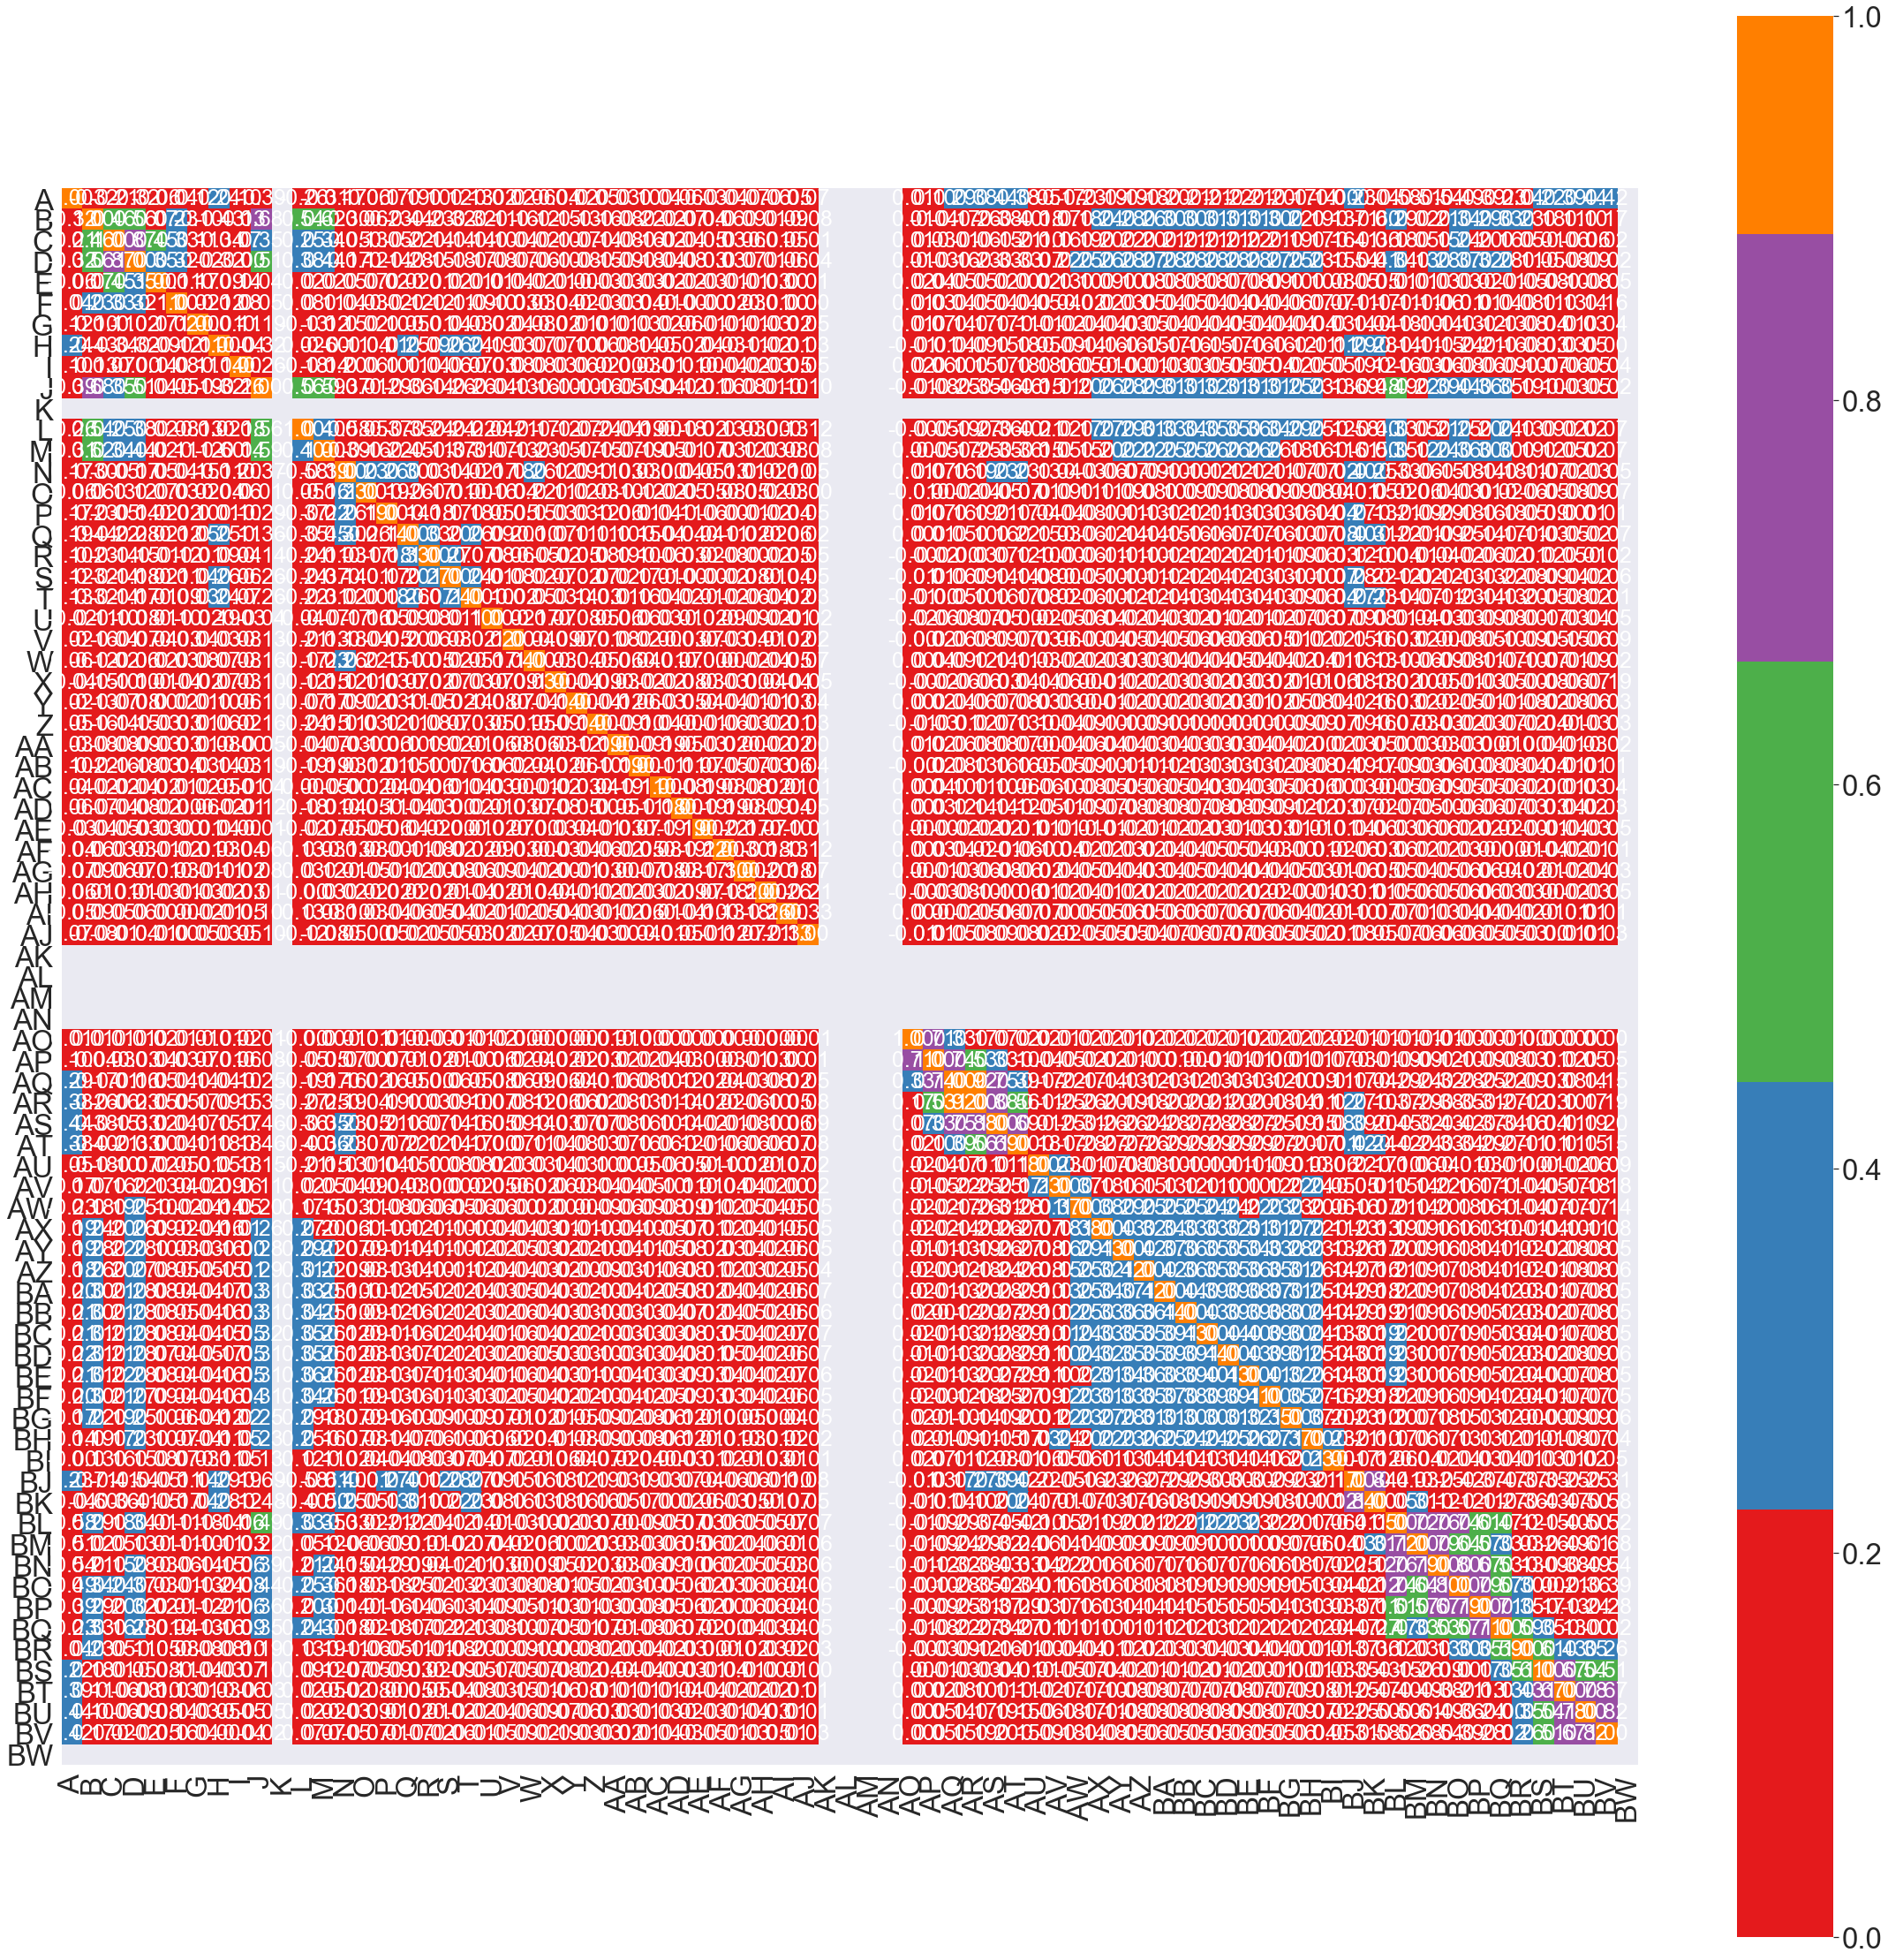

In [50]:
import seaborn as sns
correlationMap = df.corr()

plt.figure(figsize=(40,40))

sns.set(font_scale=3)
hm = sns.heatmap(correlationMap,cmap = 'Set1', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 25},
             yticklabels = df.columns, xticklabels = df.columns)
plt.show()

In [18]:
cor = df.corr()
cor_target = abs(cor["BW"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

A     0.305688
B     0.095578
C     0.351005
D     0.226154
E     0.158985
F     0.082521
G     0.191727
H     0.012871
I     0.133188
J     0.099083
L     0.047462
M     0.163030
N     0.039870
O     0.119413
P     0.010338
Q     0.095409
R     0.018660
S     0.165300
T     0.069007
U     0.135763
V     0.169391
W     0.145525
X     0.025042
Y     0.195165
Z     0.112443
AA    0.037510
AB    0.129954
AC    0.097034
AD    0.066514
AE    0.095173
        ...   
AT    0.097685
AU    0.079429
AV    0.087041
AW    0.048403
AX    0.048751
AY    0.048825
AZ    0.090615
BA    0.090505
BB    0.090522
BC    0.076605
BD    0.038501
BE    0.042789
BF    0.067993
BG    0.073695
BH    0.065111
BI    0.040334
BJ    0.229523
BK    0.389952
BL    0.383501
BM    0.233707
BN    0.156899
BO    0.076988
BP    0.151216
BQ    0.278514
BR    0.311425
BS    0.312061
BT    0.362489
BU    0.388055
BV    0.368872
BW    1.000000
Name: BW, Length: 68, dtype: float64

In [10]:
x=df[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AG', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AS', 'AT', 'AV', 'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV']]
y=df[['BW']]
y.BW.value_counts()


20    58039
4     44010
Name: BW, dtype: int64

In [22]:
from sklearn.utils import resample
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
z = pd.concat([X_train, y_train], axis=1)
not_fraud = z[z.BW<10]
fraud = z[z.BW>=10]
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 42) # reproducible results

downsampled = pd.concat([not_fraud_downsampled, fraud])
downsampled1 =downsampled .copy()
downsampled1= downsampled1.drop('BW', axis=1)
downsampled.BW.value_counts()

20    46494
4     46494
Name: BW, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)
svclassifier=SVR(kernel='linear')
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)
print ("Accuracy when using SVR is ", accuracy_score(y_test,y_pred.round(), normalize=True)*100)

In [ ]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define dataset
from sklearn.utils import resample
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
z = pd.concat([X_train, y_train], axis=1)
not_fraud = z[z.BW<10]
fraud = z[z.BW>=10]

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(x, y)
y_over


In [ ]:
import os
path = r'E:\\minor_2'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)